### FSL Installation and Kaggle Prerequisties

In [1]:
# ## On Average Takes around 16 minutes 
import os
!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py
 
fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version 

Checking FSL package
[OK] File downloaded
Installing FSL software version 6.0.5.2...
-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/[OK] FSL software installed.
-\Performing post install tasks
|Stage 1
By installing this python distribution you agree to the license terms in
/

In [ ]:
## Upload your kaggle.json file that can be downloaded from kaggle account
## Takes a bit time to read the kaggle.json file Run twice if it didn't found it
!pip install kaggle --upgrade
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir content/data
!kaggle datasets download -d lyfeisgood/something
!unzip /content/something.zip -d data
!pip install regtricks
!pip install torchsummary

#### Header Files

In [4]:
### Common Libraries
import os
import re
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

### Misc. 
import regtricks as rt

### Torch Files 
import torch
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
from torchsummary import summary

## Import my .py file ....... 
import Data_Loader as dl
import Models as model
import Prediction as pd


1.12.0+cu113
True
1.12.0+cu113
True
cuda:0
1.12.0+cu113
True


#### 2D convolution

##### Data Loading

In [ ]:
## Take around 5 minutes
## Defining the path of the data 
x,y = dl.data_loader_2D('/content/data','/content/data',55,device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)

##### Model Training

In [37]:
## Training the model
train_loss, predictions = model.train_2D_conv(1000,4,x,y,150)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 600, 91, 109]           6,000
       BatchNorm2d-2         [-1, 600, 91, 109]           1,200
              ReLU-3         [-1, 600, 91, 109]               0
         MaxPool2d-4         [-1, 600, 91, 109]               0
            Conv2d-5        [-1, 1200, 91, 109]       6,481,200
       BatchNorm2d-6        [-1, 1200, 91, 109]           2,400
              ReLU-7        [-1, 1200, 91, 109]               0
         MaxPool2d-8        [-1, 1200, 91, 109]               0
            Conv2d-9        [-1, 2400, 91, 109]      25,922,400
      BatchNorm2d-10        [-1, 2400, 91, 109]           4,800
             ReLU-11        [-1, 2400, 91, 109]               0
        MaxPool2d-12        [-1, 2400, 91, 109]               0
           Conv2d-13        [-1, 1200, 91, 109]      25,921,200
      BatchNorm2d-14        [-1, 1200, 

  0%|          | 1/1000 [00:04<1:09:15,  4.16s/it]

0.30768
2523.37890625


  3%|▎         | 26/1000 [01:49<1:08:52,  4.24s/it]

0.09730308
2523.37890625


  5%|▌         | 51/1000 [03:35<1:07:02,  4.24s/it]

0.057844467
2523.37890625


  8%|▊         | 76/1000 [05:21<1:05:17,  4.24s/it]

0.09862262
2523.37890625


 10%|█         | 101/1000 [07:07<1:03:31,  4.24s/it]

0.10584162
2523.37890625


 13%|█▎        | 126/1000 [08:53<1:01:44,  4.24s/it]

0.054530717
2523.37890625


 15%|█▌        | 151/1000 [10:39<1:00:02,  4.24s/it]

0.07455857
2523.37890625


 18%|█▊        | 176/1000 [12:25<58:15,  4.24s/it]

0.04596822
2523.37890625


 20%|██        | 201/1000 [14:11<56:25,  4.24s/it]

0.04942524
2523.37890625


 23%|██▎       | 226/1000 [15:57<54:40,  4.24s/it]

0.037473585
2523.37890625


 25%|██▌       | 251/1000 [17:43<52:55,  4.24s/it]

0.06317328
2523.37890625


 28%|██▊       | 276/1000 [19:29<51:09,  4.24s/it]

0.04212921
2523.37890625


 30%|███       | 301/1000 [21:15<49:24,  4.24s/it]

0.0201439
2523.37890625


 33%|███▎      | 326/1000 [23:01<47:38,  4.24s/it]

0.036339913
2523.37890625


 35%|███▌      | 351/1000 [24:47<45:53,  4.24s/it]

0.03482643
2523.37890625


 38%|███▊      | 376/1000 [26:33<44:04,  4.24s/it]

0.024000047
2523.37890625


 40%|████      | 401/1000 [28:19<42:20,  4.24s/it]

0.026927872
2523.37890625


 43%|████▎     | 426/1000 [30:05<40:34,  4.24s/it]

0.02194907
2523.37890625


 45%|████▌     | 451/1000 [31:51<38:48,  4.24s/it]

0.013086186
2523.37890625


 48%|████▊     | 476/1000 [33:37<37:01,  4.24s/it]

0.00971657
2523.37890625


 50%|█████     | 501/1000 [35:23<35:16,  4.24s/it]

0.016893374
2523.37890625


 53%|█████▎    | 526/1000 [37:09<33:29,  4.24s/it]

0.014852634
2523.37890625


 55%|█████▌    | 551/1000 [38:55<31:43,  4.24s/it]

0.031909436
2523.37890625


 58%|█████▊    | 576/1000 [40:41<29:56,  4.24s/it]

0.042126536
2523.37890625


 60%|██████    | 601/1000 [42:27<28:13,  4.24s/it]

0.013277617
2523.37890625


 63%|██████▎   | 626/1000 [44:13<26:25,  4.24s/it]

0.02705509
2523.37890625


 65%|██████▌   | 651/1000 [45:59<24:38,  4.24s/it]

0.05286036
2523.37890625


 68%|██████▊   | 676/1000 [47:45<22:54,  4.24s/it]

0.01689657
2523.37890625


 70%|███████   | 701/1000 [49:31<21:07,  4.24s/it]

0.018466458
2523.37890625


 73%|███████▎  | 726/1000 [51:17<19:22,  4.24s/it]

0.022103455
2523.37890625


 75%|███████▌  | 751/1000 [53:03<17:35,  4.24s/it]

0.058549
2523.37890625


 78%|███████▊  | 776/1000 [54:49<15:49,  4.24s/it]

0.006864595
2523.37890625


 80%|████████  | 801/1000 [56:35<14:03,  4.24s/it]

0.028007528
2523.37890625


 83%|████████▎ | 826/1000 [58:21<12:17,  4.24s/it]

0.021837955
2523.37890625


 85%|████████▌ | 851/1000 [1:00:07<10:31,  4.24s/it]

0.021312257
2523.37890625


 88%|████████▊ | 876/1000 [1:01:53<08:45,  4.24s/it]

0.06702489
2523.37890625


 90%|█████████ | 901/1000 [1:03:39<06:59,  4.24s/it]

0.05235528
2523.37890625


 93%|█████████▎| 926/1000 [1:05:25<05:13,  4.24s/it]

0.0061486834
2523.37890625


 95%|█████████▌| 951/1000 [1:07:11<03:27,  4.24s/it]

0.0024861062
2523.37890625


 98%|█████████▊| 976/1000 [1:08:57<01:41,  4.24s/it]

0.0011784662
2523.37890625


100%|██████████| 1000/1000 [1:10:39<00:00,  4.24s/it]


##### Results and Plots

(1, 91, 109)
<class 'numpy.ndarray'>
(10, 1, 91, 109)
<class 'numpy.ndarray'>


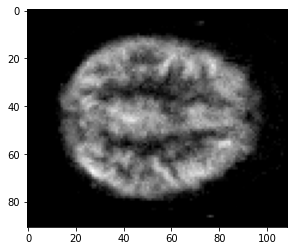

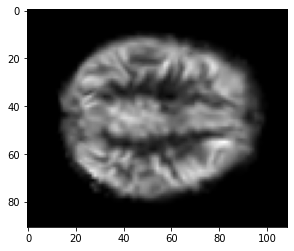

In [45]:
pd.predictions_2D(y,predictions,1)

#### MISC

In [35]:
print((torch.cuda.memory_allocated())/(1024*1024));
!nvidia-smi

841.10107421875
Sat Jul 30 17:07:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    36W / 250W |   7315MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                        

In [34]:
torch.cuda.empty_cache()
dl.print_data_shape(predictions[0])

torch.Size([1, 91, 109])
torch.Size([1, 91, 109])
torch.Size([1, 91, 109])
torch.Size([1, 91, 109])


(1, 91, 109, 91)
<class 'numpy.ndarray'>


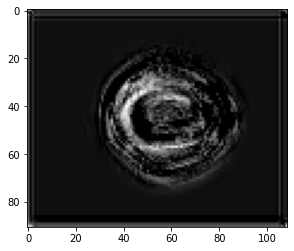

In [9]:
# x_first = predictions[0][0]
# pred_np = x_first.cpu().detach().numpy()
# dl.print_data_dimension(pred_np); print(type(pred_np))

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.animation as animation

# img = [] # some array of images
# frames = [] # for storing the generated images
# fig = plt.figure()
# for i in range(0,x.shape[4]):
#     ## For L2 Distance
#     frames.append([plt.imshow(pred_np[0,:,:,i], cmap=cm.Greys_r,animated=True)])
# ani = animation.ArtistAnimation(fig, frames, interval=120, blit=True, repeat_delay=1000)
# ani.save('movie.mp4')


#### 3D convolution

##### Data Loading

In [5]:

x,y = dl.data_loader_3D('/content/data','/content/data',device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)


Shape of MRI images - >
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])

Shape of ASL images - >
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])
torch.Size([1, 91, 109, 91])

Stats for MRI data(X) - >
tensor(57976.9219) tensor(0.) tensor(0.0642) tensor(0.1260)
tensor(63041.9375) tensor(0.) tensor(0.0698) tensor(0.1217)
tensor(69193.1094) tensor(0.) tensor(0.0767) tensor(0.1362)
tensor(67808.2734) tensor(0.) tensor(0.0751) tensor(0.1417)
tensor(85693.1250) tensor(0.) tensor(0.0949) tensor(0.1830)
tensor(75418.3359) tensor(0.) tensor(0.0836

##### Model Training


In [6]:
train_loss, predictions = model.train_conv_3D(1000,4,x,y,3)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1      [-1, 12, 91, 109, 92]             228
       BatchNorm3d-2      [-1, 12, 91, 109, 92]              24
              ReLU-3      [-1, 12, 91, 109, 92]               0
         MaxPool3d-4      [-1, 12, 91, 109, 92]               0
            Conv3d-5      [-1, 24, 91, 109, 93]           5,208
       BatchNorm3d-6      [-1, 24, 91, 109, 93]              48
              ReLU-7      [-1, 24, 91, 109, 93]               0
         MaxPool3d-8      [-1, 24, 91, 109, 93]               0
            Conv3d-9      [-1, 48, 91, 109, 94]          20,784
      BatchNorm3d-10      [-1, 48, 91, 109, 94]              96
             ReLU-11      [-1, 48, 91, 109, 94]               0
        MaxPool3d-12      [-1, 48, 91, 109, 94]               0
           Conv3d-13      [-1, 24, 91, 109, 95]          20,760
      BatchNorm3d-14      [-1, 24, 91, 

  0%|          | 1/1000 [00:15<4:12:05, 15.14s/it]

0.20673808
70.74267578125


  3%|▎         | 26/1000 [01:36<52:58,  3.26s/it]

0.059229508
70.74267578125


  5%|▌         | 51/1000 [02:58<51:37,  3.26s/it]

0.027159281
70.74267578125


  8%|▊         | 76/1000 [04:20<50:14,  3.26s/it]

0.013364217
70.74267578125


 10%|█         | 101/1000 [05:41<48:53,  3.26s/it]

0.010692979
70.74267578125


 13%|█▎        | 126/1000 [07:03<47:34,  3.27s/it]

0.010607304
70.74267578125


 15%|█▌        | 151/1000 [08:24<46:12,  3.27s/it]

0.0070913793
70.74267578125


 18%|█▊        | 176/1000 [09:46<44:50,  3.27s/it]

0.010563966
70.74267578125


 20%|██        | 201/1000 [11:08<43:26,  3.26s/it]

0.008311625
70.74267578125


 23%|██▎       | 226/1000 [12:29<42:04,  3.26s/it]

0.0056523182
70.74267578125


 25%|██▌       | 251/1000 [13:51<40:45,  3.26s/it]

0.005783454
70.74267578125


 28%|██▊       | 276/1000 [15:12<39:24,  3.27s/it]

0.004418134
70.74267578125


 30%|███       | 301/1000 [16:34<38:02,  3.27s/it]

0.006861845
70.74267578125


 33%|███▎      | 326/1000 [17:56<36:39,  3.26s/it]

0.0034110858
70.74267578125


 35%|███▌      | 351/1000 [19:17<35:20,  3.27s/it]

0.0038434227
70.74267578125


 38%|███▊      | 376/1000 [20:39<33:55,  3.26s/it]

0.0073711523
70.74267578125


 40%|████      | 401/1000 [22:00<32:35,  3.27s/it]

0.0041810996
70.74267578125


 43%|████▎     | 426/1000 [23:22<31:12,  3.26s/it]

0.0051069
70.74267578125


 45%|████▌     | 451/1000 [24:44<29:50,  3.26s/it]

0.0060567777
70.74267578125


 48%|████▊     | 476/1000 [26:05<28:30,  3.27s/it]

0.006383144
70.74267578125


 50%|█████     | 501/1000 [27:27<27:07,  3.26s/it]

0.004899616
70.74267578125


 53%|█████▎    | 526/1000 [28:48<25:46,  3.26s/it]

0.0040321164
70.74267578125


 55%|█████▌    | 551/1000 [30:10<24:26,  3.27s/it]

0.0056598405
70.74267578125


 58%|█████▊    | 576/1000 [31:32<23:04,  3.26s/it]

0.0058158934
70.74267578125


 60%|██████    | 601/1000 [32:53<21:43,  3.27s/it]

0.0037245194
70.74267578125


 63%|██████▎   | 626/1000 [34:15<20:20,  3.26s/it]

0.0037746895
70.74267578125


 65%|██████▌   | 651/1000 [35:36<18:58,  3.26s/it]

0.0030454928
70.74267578125


 68%|██████▊   | 676/1000 [36:58<17:36,  3.26s/it]

0.0033457796
70.74267578125


 70%|███████   | 701/1000 [38:20<16:16,  3.27s/it]

0.004845134
70.74267578125


 73%|███████▎  | 726/1000 [39:41<14:54,  3.27s/it]

0.008104559
70.74267578125


 75%|███████▌  | 751/1000 [41:03<13:32,  3.26s/it]

0.0036011708
70.74267578125


 78%|███████▊  | 776/1000 [42:24<12:11,  3.27s/it]

0.002030486
70.74267578125


 80%|████████  | 801/1000 [43:46<10:49,  3.26s/it]

0.005889973
70.74267578125


 83%|████████▎ | 826/1000 [45:08<09:27,  3.26s/it]

0.0058111507
70.74267578125


 85%|████████▌ | 851/1000 [46:29<08:06,  3.26s/it]

0.0060383966
70.74267578125


 88%|████████▊ | 876/1000 [47:51<06:44,  3.27s/it]

0.0033950051
70.74267578125


 90%|█████████ | 901/1000 [49:12<05:22,  3.26s/it]

0.0053475327
70.74267578125


 93%|█████████▎| 926/1000 [50:34<04:01,  3.27s/it]

0.005817596
70.74267578125


 95%|█████████▌| 951/1000 [51:55<02:40,  3.27s/it]

0.0037385991
70.74267578125


 98%|█████████▊| 976/1000 [53:17<01:18,  3.27s/it]

0.0024017857
70.74267578125


100%|██████████| 1000/1000 [54:35<00:00,  3.28s/it]


##### Results and Video

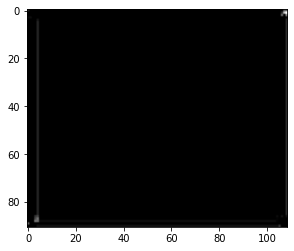

In [8]:
pd.predictions_3D(y,predictions,0)
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Result.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### 2d convlutions

In [ ]:
## Take around 5 minutes
## Defining the path of the data 
x,y = dl.data_loader('/content/data','/content/data',device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)

## getting out data for only one slice


In [11]:
print(x.shape); print(y.shape); 
X = x.cpu().detach().numpy(); Y = y.cpu().detach().numpy();
print(X.shape); print(type(X)); print(Y.shape); print(type(Y)); 

torch.Size([10, 1, 91, 109, 91])
torch.Size([10, 1, 91, 109, 91])
(10, 1, 91, 109, 91)
<class 'numpy.ndarray'>
(10, 1, 91, 109, 91)
<class 'numpy.ndarray'>


In [53]:
## idel Slice number
import matplotlib.pyplot as plt
x_1 = []; y_1 = []
slice_number = 55
for i in range(0,X.shape[0]):
    x_1.append(X[i][:,:,:,slice_number]); y_1.append(Y[i][:,:,:,slice_number])
x_1 = torch.as_tensor(np.array(x_1),dtype=torch.float32); y_1 = torch.as_tensor(np.array(y_1),dtype=torch.float32)
# for i in x_1:
#     plt.imshow(i[:,:],cmap = 'gray')
#     plt.show()
print(type(x_1)); print(type(y_1)); print(x_1.shape); print(y_1.shape) 

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([10, 1, 91, 109])
torch.Size([10, 1, 91, 109])


In [54]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Conv2d, MSELoss
from torch.optim import Adam, SGD
from torchsummary import summary 
from tqdm import tqdm
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

### MODEL - 1 3d Convnet 
hidden = lambda c_in, c_out: Sequential(
    Conv2d(c_in, c_out, (3,3), padding=(1,1)),
    BatchNorm2d(c_out),
    ReLU(),
    MaxPool2d(1)
    )
hidden_2 = lambda c_in, c_out: Sequential(
    Conv2d(c_in, c_out, (3,3),padding=(1,1)),
    BatchNorm2d(c_out),
    ReLU(),
    MaxPool2d(1)
    )
Hidden = lambda c_in, c_out: Sequential(
    Conv2d(c_in, c_out, (1,1)),
    BatchNorm2d(c_out),
    ReLU(),
    MaxPool2d(1)
    )

class convnet_2D(Module):
    '''Class for the Model to be fitted on MRI data'''
    def __init__(self, c):
        '''Intiallizing the layers of the Model'''
        super(convnet_2D, self).__init__();
        self.hidden1 = hidden(1,4*c);
        self.hidden2 = hidden(4*c,8*c);
        self.hidden3 = hidden(8*c,16*c);
        self.hidden4 = hidden(16*c,8*c);
        self.hidden5 = hidden(8*c, 16*c);
        self.hidden6 = hidden_2(16*c,8*c);
        self.hidden7 = Hidden(8*c,1);
    def forward(self, x):
        '''Implements the forward pass of the Network'''
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
        x = self.hidden5(x)
        x = self.hidden6(x)
        x = self.hidden7(x)
        return x  

def train_model_3D(epochs,batch_size,x,y,channels=1):
    '''
    Params - Epochs, Batch Size, Data, Channels default = 1 
    Result - Returns the predictions and train loss 
    '''
    model = convnet_2D(channels).to(device)
    summary(model,(1,91,109))
    ctr = 0; train_loss = []; f_loss = []; predic = [];

    ## Model criterion
    lossFn = MSELoss(); opt = Adam(model.parameters(), lr=1e-5);
    X = x.to(device); Y = y.to(device); model.train();

    ## Loop around the model
    for e in tqdm(range(0, epochs)):
        # Batch Loss and Train Loss 
        batch_loss = []; train_loss = [];
        # Permutation for the data
        permutation = torch.randperm(X.size()[0])
        ctr = ctr + 1;
        ## Loop over batches 
        for i in range(0,X.size()[0], batch_size):
            ## Intialize the optimizer
            opt.zero_grad();
            ## Setting up the indexes for batch
            indices = permutation[i:i+batch_size];
            batch_x, batch_y = X[indices], Y[indices];
            ## Making prediction and Observing the loss
            pred = model(batch_x) ; loss = lossFn(pred, batch_y);
            ##  Update the loss using gradient descent
            loss.backward(); opt.step();
            ## Saving the loss on cpu rather than gpu to optimize memory
            batch_loss.append(loss.cpu().detach().numpy()); 
            if ctr == epochs - 1 : predic.append(pred)
            ## Deleting the batch variables to optimize memoery
            del batch_x , batch_y; 
            ## Deleting the loss and the predictions made 
            del loss , pred;
        train_loss.append(batch_loss);
        ## Printing the verbose
        if(e%25 == 0): 
            print(batch_loss[-1]); print((torch.cuda.memory_allocated())/(1024*1024))
    ## Freeing up GPU memory
    del X,Y;
    return train_loss,predic

1.12.0+cu113
True


In [ ]:
train, predict = train_model_3D(1500,4,x_1,y_1,75)

(1, 91, 109)
<class 'numpy.ndarray'>
(10, 1, 91, 109)
<class 'numpy.ndarray'>


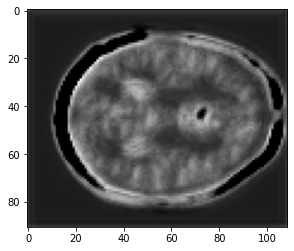

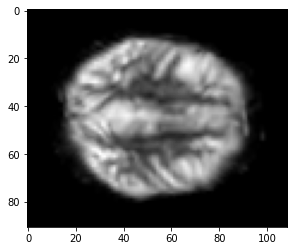

In [28]:
x_first = predictions[0][0]
y_first = y.cpu().detach().numpy()
pred_np = x_first.cpu().detach().numpy()
dl.print_data_dimension(pred_np); print(type(pred_np))
dl.print_data_dimension(y_first); print(type(y_first))

plt.imshow(pred_np[0,:,:],cmap = 'gray'); plt.show();
plt.imshow(y_first[0][0,:,:],cmap = 'gray'); plt.show();
# for i in predict:
#      plt.imshow(i[:,:],cmap = 'gray')
#      plt.show()